In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(blocks)

In [3]:
str(blocks)

'data.frame':	100 obs. of  6 variables:
 $ Child : Factor w/ 25 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Number: int  11 9 8 9 10 13 10 7 6 12 ...
 $ Time  : num  30 19 18.6 23 29 178 42 20.2 12 39.2 ...
 $ Trial : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Shape : Factor w/ 2 levels "Cube","Cylinder": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age   : num  4.67 5 4.42 4.33 4.33 4.83 4.42 5 3.58 4 ...


In [8]:
blocks

Child,Number,Time,Trial,Shape,Age
A,11,30.0,1,Cube,4.67
B,9,19.0,1,Cube,5.00
C,8,18.6,1,Cube,4.42
D,9,23.0,1,Cube,4.33
E,10,29.0,1,Cube,4.33
F,13,178.0,1,Cube,4.83
G,10,42.0,1,Cube,4.42
H,7,20.2,1,Cube,5.00
I,6,12.0,1,Cube,3.58
J,12,39.2,1,Cube,4.00


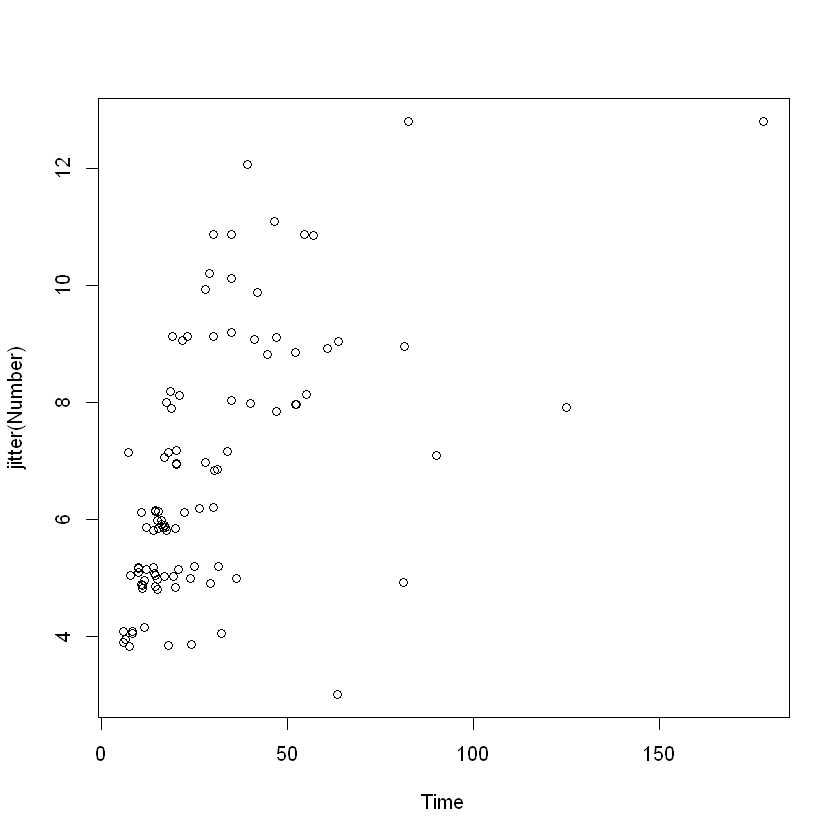

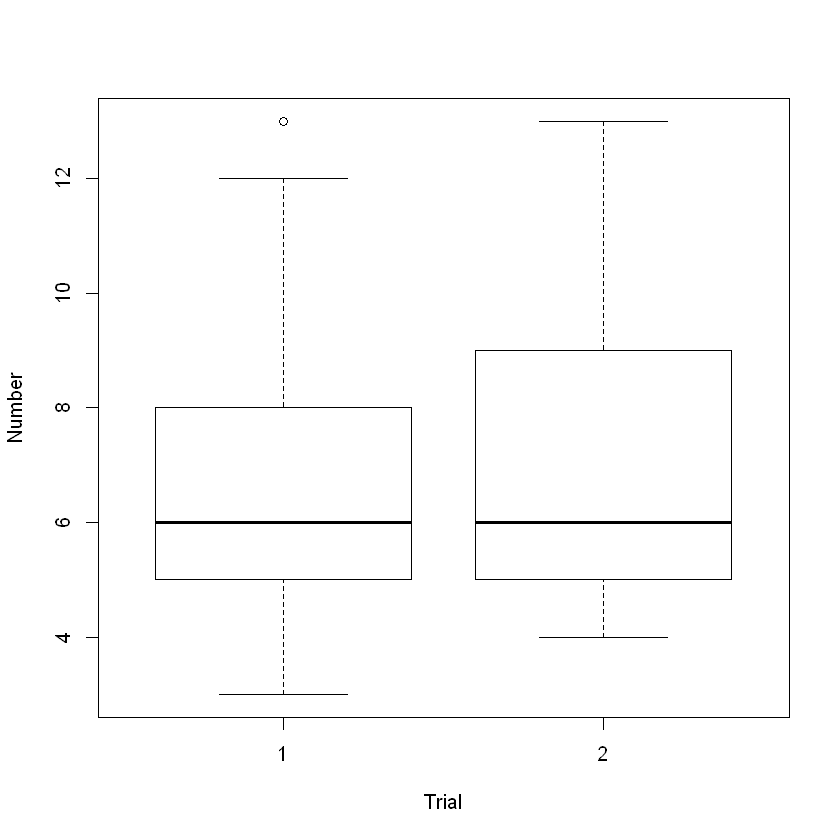

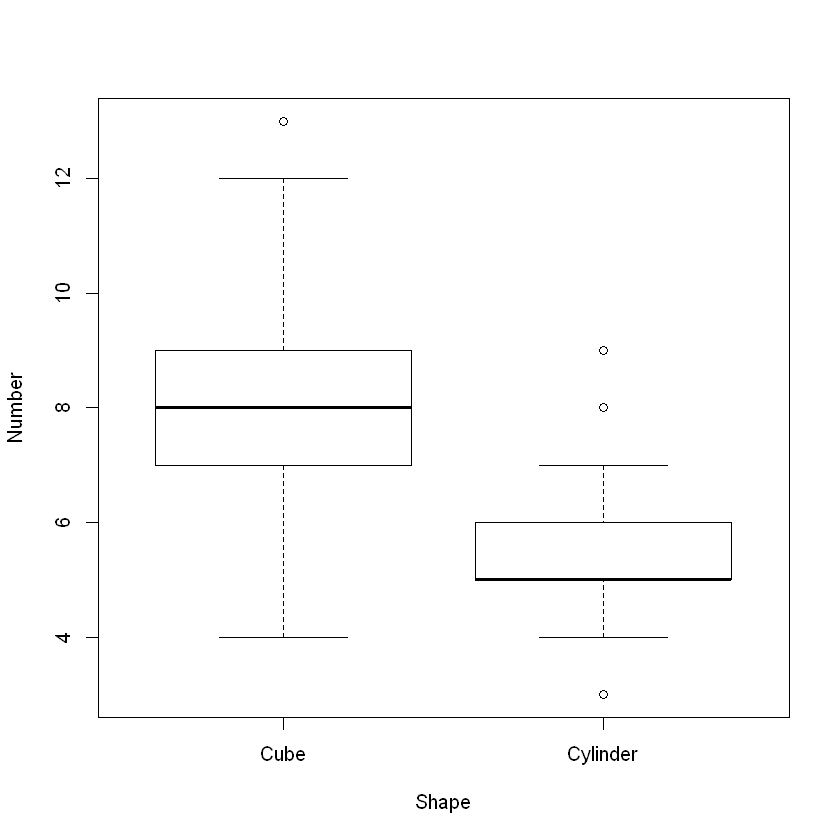

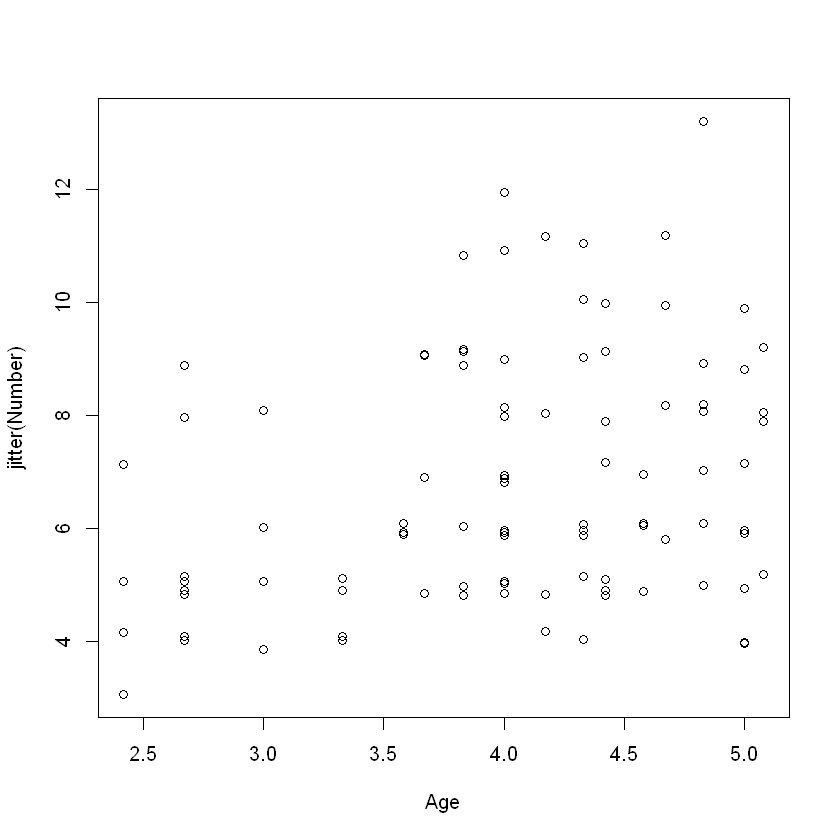

In [7]:
with(blocks, {
    plot(jitter(Number) ~ Time)
    boxplot(Number ~ Trial)
    boxplot(Number ~ Shape)
    plot(jitter(Number) ~ Age)
})

In [12]:
blocks$Trial <- factor(blocks$Trial, levels = c(1, 2), labels=c(0,1))

In [13]:
glm.1 <- glm(Number ~ Time + factor(Trial) + Shape + Age, data=blocks, family = poisson(link="log"))

In [14]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.375838245,0.231462970,5.9440966,2.779857e-09
Time,0.004096935,0.001266779,3.2341349,1.220118e-03
factor(Trial)1,0.029392649,0.076661009,0.3834107,7.014153e-01
ShapeCylinder,-0.334040757,0.080966113,-4.1256860,3.696313e-05
Age,0.135226398,0.053516101,2.5268358,1.150953e-02


In [15]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,99,69.42922,NA
Time,1,19.5735886,98,49.85563,9.679814e-06
factor(Trial),1,0.1470973,97,49.70854,7.013249e-01
Shape,1,16.9678576,96,32.74068,3.801802e-05
Age,1,6.5267593,95,26.21392,1.062634e-02


In [16]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 1

[1] 1

[1] 0.275936

[1] 0.277175


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.99096, p-value = 0.7418


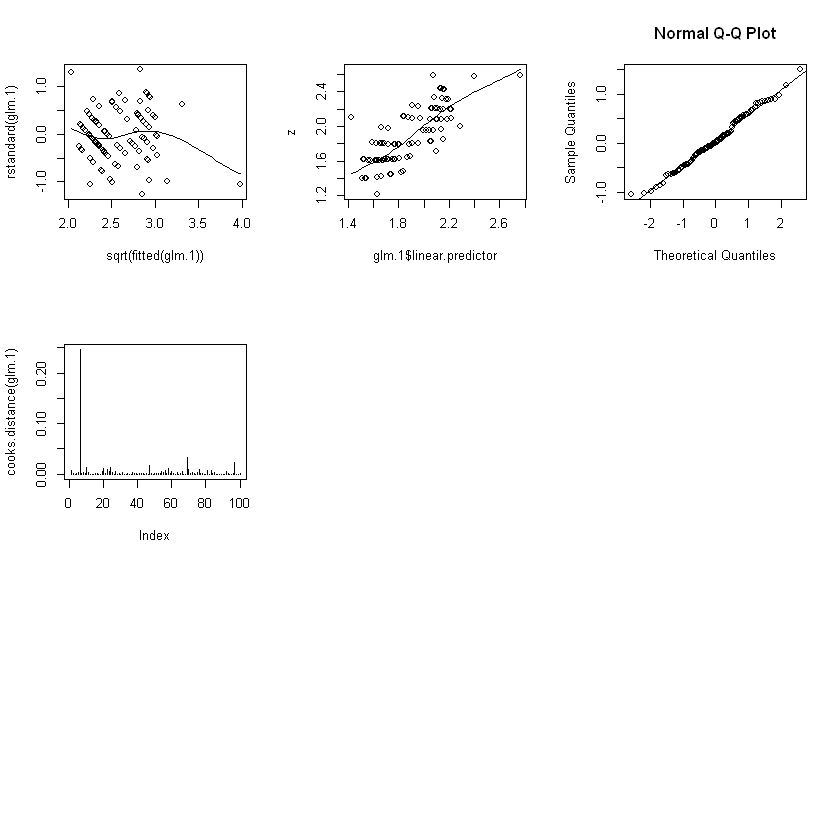

In [17]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ sqrt(fitted(glm.1)))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
plot(cooks.distance(glm.1), type="h")
shapiro.test(qresid(glm.1))

In [18]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.Time dfb.f(T) dfb.ShpC  dfb.Age    dffit    cov.r   cook.d 
       0        1        0        0        0        2        4        0 
     hat 
       2

In [19]:
rowSums(influence.measures(glm.1)$is.inf)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   4   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   2   0   0   0   0 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0

In [20]:
extractAIC(glm.1)

[1]   5.0000 409.6087